# https://www.kaggle.com/kaggle/kaggle-survey-2017

# 캐글러를 대상으로 한 설문조사
설문기간 : 2017년 8월 7일부터 8월 25일까지

평균 응답 시간은 16.4 분

171 개 국가 및 지역에서 16,716 명의 응답자

특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화

설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)

대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨

급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함

미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공

질문은 선택적

모든 질문이 모든 응답자에게 보여지는 것은 아님

취업을 한 사람과 학생을 나누어 다른 질문을 함

응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리

객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음

주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정


# 데이터 파일
5 개의 데이터 파일을 제공

schema.csv : 설문 스키마가있는 CSV 파일입니다. 이 스키마에는 multipleChoiceResponses.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있습니다.

multipleChoiceResponses.csv : 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답

freeformResponses.csv : Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변입니다. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음

conversionRates.csv : R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율 (USD)

RespondentTypeREADME.txt : schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마입니다.

In [5]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

# Import the standard Python Scientific Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

In [7]:
question = pd.read_csv('C:/Users/uos/Desktop/online_study/todays_kaggle/Kaggle_survey/schema.csv')
question.shape

(290, 3)

In [8]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [9]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [10]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('C:/Users/uos/Desktop/online_study/todays_kaggle/Kaggle_survey/multipleChoiceResponses.csv', 
                  encoding="ISO-8859-1", low_memory=False)
mcq.shape

(16716, 228)

In [12]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [13]:
mcq.head(10) #부분적으로 전부 NaN : 질문이 선택적으로 보여졌음

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,Brazil,46.0,Employed full-time,NaN,NaN,Yes,NaN,Data Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Male,United States,35.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,India,22.0,Employed full-time,NaN,NaN,No,Yes,Software Developer/Software Engineer,Fine,...,Very Important,Somewhat important,Very Important,Somewhat important,Somewhat important,Not important,Very Important,Very Important,Somewhat important,Somewhat important
8,Female,Australia,43.0,Employed full-time,NaN,NaN,Yes,NaN,Business Analyst,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Male,Russia,33.0,Employed full-time,NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


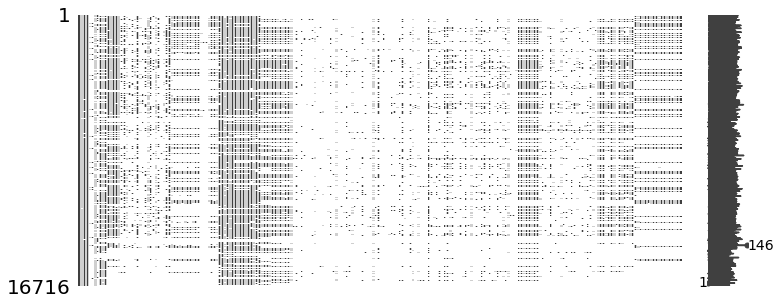

In [14]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬럼이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

16,716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

# 설문통계

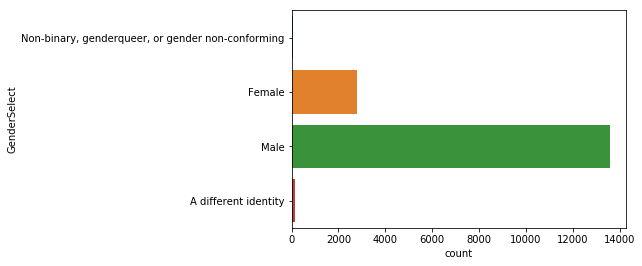

In [16]:
# 성별
sns.countplot(y='GenderSelect', data=mcq) #남성의 비율이 훨씬 높은 편

In [17]:
# 국가별 응답수
con_df = pd.DataFrame(mcq['Country'].value_counts()) #국가별 count
# 'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해준다.
# 우리 나라는 18위이고 전체 52개국에서 참여했지만 20위까지만 본다. 
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada
